## INVESTIGATE THE DATASET

In [1]:
import pandas as pd
from cleaning_functions import fatality
import matplotlib.pyplot as plt


Firs, let's import the clean dataset:

In [2]:
data = pd.read_csv('data_clean.csv')

To begin with, it is a good idea to take a look at the raw numbers:<br> **How many attacks could I classify to have happened during the night and during the day?**

Day      2207
Night     216
Name: night_day, dtype: int64


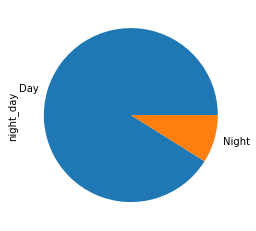

In [3]:
print(data.night_day.value_counts())
data.night_day.value_counts().plot.pie()

Not surprisingly, most of the attacks have happened during the day.There is usually more people in the water during the day that during the night. <br> This same pattern shows up when looking at the total number of fatal accidents during the day and night:

N    1814
Y     393
Name: fatal, dtype: int64
N    167
Y     49
Name: fatal, dtype: int64


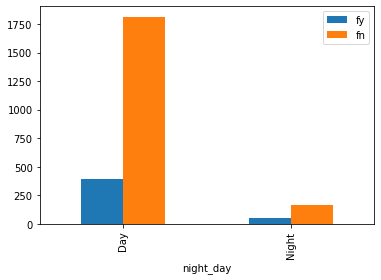

In [5]:
print(data.loc[data.night_day=='Day','fatal'].value_counts())
print(data.loc[data.night_day=='Night','fatal'].value_counts())
data.groupby(['night_day']).agg({'fy':'sum',
                                'fn':'sum'}).plot.bar()

However, these raw numbers are difficult to interpret. One way to meassure the severity of the attacks is checking for the percentage of fatal attacks:

In [6]:
#We use the custom function fatality to calculate % of fatal attacks.
overall_fatality = fatality(data['fatal'])
print(f"The overall fatality is {round(overall_fatality,2)}%")

The overall fatality is 18.24%


night_day
Day      17.806978
Night    22.685185
Name: fatal, dtype: float64


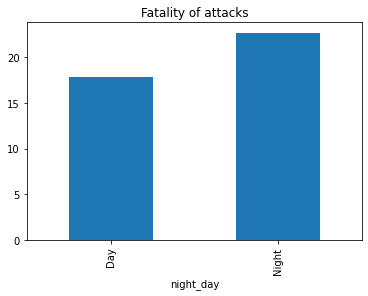

In [7]:
print(data.groupby(['night_day']).fatal.apply(fatality))
data.groupby(['night_day']).fatal.apply(fatality).plot.bar(title='Fatality of attacks')

Total number of cases per activity and day night
   activity night_day  fatal
0   fishing       Day    217
1   fishing     Night     26
2     other       Day    115
3     other     Night     16
4  standing       Day    198
5  standing     Night     12
6   surfing       Day    954
7   surfing     Night     94
8  swimming       Day    723
9  swimming     Night     68


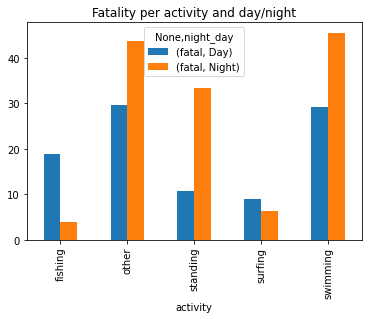

In [8]:
print('Total number of cases per activity and day night')
print(data[['activity','night_day','fatal']].groupby(['activity','night_day']).fatal.agg(len).reset_index())

data.pivot_table(values=['fatal'], index=['activity'], columns=['night_day'], aggfunc=fatality).plot.bar(title='Fatality per activity and day/night')

In [9]:
data[['decade','fatal', 'night_day']].groupby(['decade','night_day']).agg('count').sort_values(by='fatal', ascending = False).reset_index()

,decade,night_day,fatal
0,2000,Day,561
1,2010,Day,538
2,1950bef,Day,352
3,1990,Day,291
4,1960,Day,188
5,1980,Day,174
6,1970,Day,103
7,2000,Night,59
8,1950bef,Night,58
9,2010,Night,35


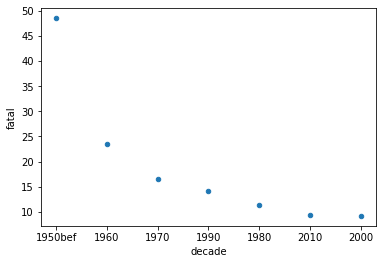

In [16]:
data[['decade','fatal']].groupby(['decade']).agg(fatality).sort_values(by='fatal', ascending = False).reset_index().plot.scatter('decade', 'fatal')

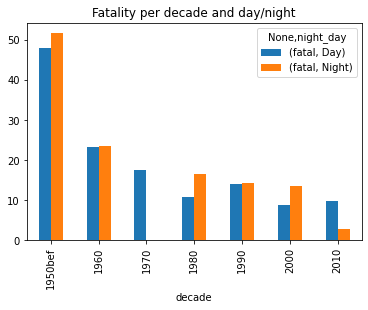

In [14]:
data.pivot_table(values=['fatal'], index=['decade'], columns=['night_day'], aggfunc=fatality).plot.bar(title='Fatality per decade and day/night')

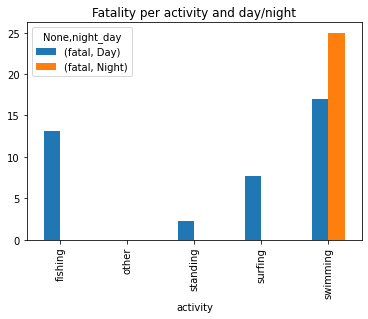

In [17]:
data[data.decade == '2010'].pivot_table(values=['fatal'], index=['activity'], columns=['night_day'], aggfunc=fatality).plot.bar(title='Fatality per activity and day/night')